# Applied Machine Learning Homework 5
### Po-Chieh Liu (pl2441), Peter Grantcharov (pdg2116)

## Task 1
Run a multilayer perceptron (feed forward neural network) with **two hidden layers** and **rectified linear nonlinearities** on the iris dataset using the keras **Sequential** interface . Include code for selecting **regularization strength** and **number of hidden units** using **GridSearchCV** and evaluation on an independent test-set.

In [0]:
import numpy as np
import pandas as pd


In [0]:
# load iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0)


In [0]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns


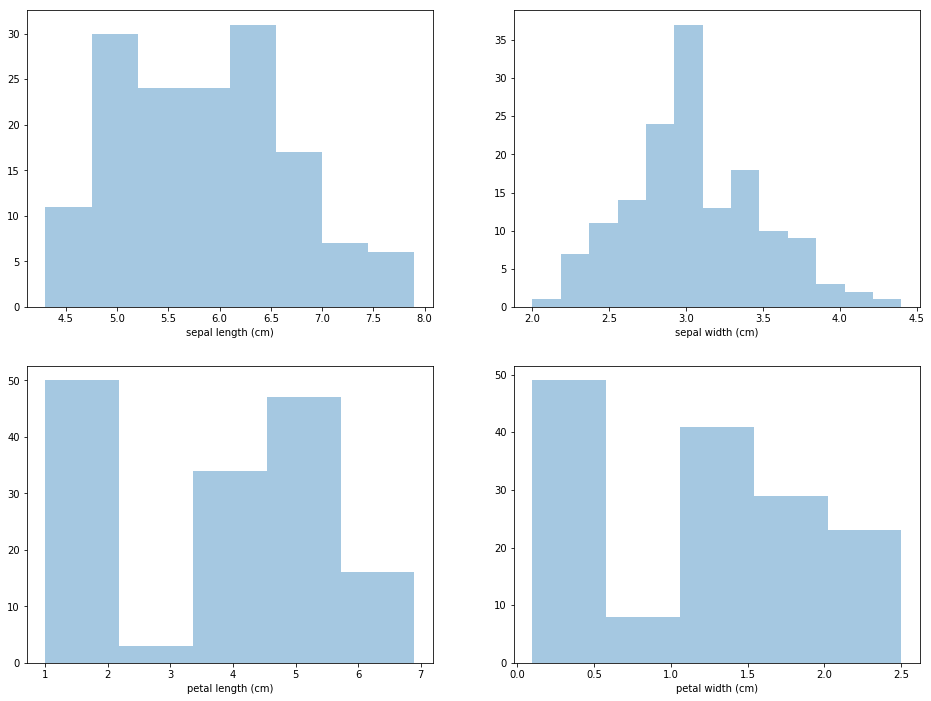

In [0]:
fig, ax = plt.subplots(2, 2, figsize = (16,12))
axflat = ax.flatten()
for i in range(4):
    sns.distplot(iris['data'][:,i], ax = axflat[i], kde = False)
    axflat[i].set_xlabel(iris.feature_names[i])
    

# Standard Scalar is required

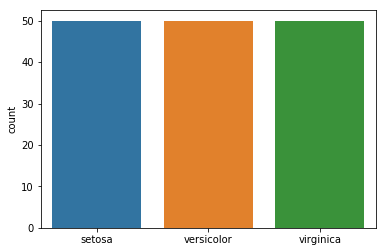

In [0]:
ax = sns.countplot(iris['target'])
_ = ax.set_xticklabels(iris.target_names)


# balanced data

In [0]:
# tf
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from keras import backend
backend.tensorflow_backend._get_available_gpus()


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# keras
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.utils import multi_gpu_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier


In [0]:
# preprocessing X
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# preprocessing y
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


In [0]:
def make_model(optimizer = 'adam', hidden_size1 = 16,
               hidden_size2 = 16, strangth = 0.1):
    # initiate
    model = Sequential()
    
    # first layer
    model.add(Dense(hidden_size1, 
                    activation = 'relu', 
                    input_dim = 4,
                    kernel_regularizer = regularizers.l2(strangth)) )
    
    # second
    model.add(Dense(hidden_size2, 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(strangth)) )
    
    # output layer
    model.add(Dense(3, activation = 'softmax'))
    
    # complie
    model.compile(optimizer = optimizer, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model


In [0]:
# link keras-scikit
clf = KerasClassifier(make_model)

# param_grid
param_grid = {'epochs': [1, 3, 5],
              'hidden_size1': [2**x for x in range(5, 8)],
              'hidden_size2': [2**x for x in range(5, 8)],
              'strangth':np.logspace(-1,1,3)}

# sss
sss = StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2)


In [0]:
# grid
grid = GridSearchCV(clf, param_grid=param_grid, cv=sss, return_train_score=True)
grid.fit(X_train_scaled, y_train)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
89/89 [==============================] - 0s 111us/step
Epoch 1/1
89/89 [==============================] - 0s 111us/step
Epoch 1/1
89/89 [==============================] - 0s 123us/step
Epoch 1/1
89/89 [==============================] - 0s 116us/step
Epoch 1/1
89/89 [==============================] - 0s 136us/step
Epoch 1/1
89/89 [==============================] - 0s 121us/step
Epoch 1/1
89/89 [==============================] - 0s 142us/step
Epoch 1/1
89/89 [==============================] - 0s 143us/step
Epoch 1/1
89/89 [==============================] - 0s 133us/step
Epoch 1/1
89/89 [==============================] - 0s 150us/step
Epoch 1/1
89/89 [==============================] - 0s 156us/step
Epoch 1/1
89/89 [==============================] - 0s 142us/step
Epoch 1/1
89/89 [==============================] - 0s 157us/step
Epoch 1/1
89/89 [==================

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0ea048aac8>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epochs': [1, 3, 5], 'hidden_size1': [32, 64, 128], 'hidden_size2': [32, 64, 128], 'strangth': array([ 0.1,  1. , 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [0]:
grid.best_params_


{'epochs': 3, 'hidden_size1': 64, 'hidden_size2': 128, 'strangth': 0.1}

In [0]:
grid.best_score_


0.8550724585851034

In [0]:
res = pd.DataFrame(grid.cv_results_)


In [0]:
res.pivot_table(index=["param_epochs", 
                       "param_hidden_size1",
                       "param_hidden_size2"],
                values=['mean_train_score', "mean_test_score"])


mean_test_score  \
param_epochs param_hidden_size1 param_hidden_size2                    
1            32                 32                         0.347826   
                                64                         0.483092   
                                128                        0.405797   
             64                 32                         0.333333   
                                64                         0.376812   
                                128                        0.285024   
             128                32                         0.410628   
                                64                         0.410628   
                                128                        0.439614   
3            32                 32                         0.415459   
                                64                         0.458937   
                                128                        0.478261   
             64                 32                         0.478261   
                                64                         0.468599   
                                128                        0.594203   
             128                32                         0.526570   
                                64                         0.555556   
                                128                        0.603865   
5            32                 32                         0.473430   
                                64                         0.483092   
                                128                        0.690821   
             64                 32                         0.579710   
                                64                         0.700483   
                                128                        0.618357   
             128                32                         0.637681   
                                64                         0.676329   
                                128                        0.753623   

                                                    mean_train_score  
param_epochs param_hidden_size1 param_hidden_size2                    
1            32                 32                          0.359551  
                                64                          0.461923  
                                128                         0.416979  
             64                 32                          0.325843  
                                64                          0.367041  
                                128                         0.320849  
             128                32                          0.395755  
                                64                          0.401998  
                                128                         0.454432  
3            32                 32                          0.399501  
                                64                          0.456929  
                                128                         0.503121  
             64                 32                          0.498127  
                                64                          0.505618  
                                128                         0.598002  
             128                32                          0.513109  
                                64                          0.571785  
                                128                         0.615481  
5            32                 32                          0.474407  
                                64                          0.465668  
                                128                         0.710362  
             64                 32                          0.569288  
                                64                          0.691635  
                                128                         0.651685  
             128                32                          0.636704  
                                64                          0.711610  
    

In [0]:
grid.score(X_test_scaled, y_test)


38/38 [==============================] - 11s 286ms/step


0.552631582084455

## Summary 
As we can see, we performed a grid seach over the sizes of the two hidden layers, as well as the epoch count and the regularization "strangth" parameter for a multi-layer perceptron model on the Iris dataset. This grid search yielded the best parameter values of: 

1. epochs: 3
2. hidden_size1: 64
3. hidden_size2: 128
4. strangth: 0.1

Our score using these parameters during the grid search was about 0.86, and when applying this network to the test set, we achieved a score of about 0.55.